In [386]:
import pandas as pd
import matplotlib.pyplot as plt

Membaca file DataFrame.csv

In [387]:
lr = pd.read_csv(r'D:\temp\tubes2\harvardnobeldata\laureate.csv')

Cleansing Data

Atribut: 'bornCountry' dan 'country'
Data kotor: data nama negara yang masih merujuk nama pada tahun tertentu sebelum namanya seperti sekarang. Contoh: seorang nobel laureate lahir di Polandia yang saat itu dikuasai Jerman, sehingga pada data dituliskan 'German-occupied Poland (now Poland)'.
Jumlah: 117/975 = 12% dari seluruh data pada atribut 'bornCountry'.
Jumlah: 1/975 = 0.1% dari seluruh data pada atribut 'country'.
Data kotor diubah dengan nama negara yang mengikuti kondisi zaman sekarang.

Data kotor: data tak bernilai (NaN).
Jumlah: 32/975 = 3.28% dari seluruh data pada atribut 'bornCountry'.
Jumlah: 259/975 = 26.56% dari seluruh data pada atribut 'country'.
Data kotor ditangani dengan menghapus baris terkait.

In [388]:
#Perhitungan jumlah data kotor
print("Atribut 'country'")
ctr = lr.country.tolist()
print('Jumlah Keseluruhan Data:', len(ctr))
kotorna = 0
kotor=0
for i in range(len(ctr)):
    if pd.isna(ctr[i]) == True:
        kotorna += 1
        pass
    else:
        if 'now' in ctr[i]:
            kotor+=1
print( 'Jumlah data kotor nama negara:', kotor, '\nJumlah data kotor NaN:', kotorna)
#------------------------------#
print("\nAtribut 'bornCountry'")
ctr = lr.bornCountry.tolist()
print('Jumlah Keseluruhan Data:', len(ctr))
kotorna = 0
kotor=0
for i in range(len(ctr)):
    if pd.isna(ctr[i]) == True:
        kotorna += 1
        pass
    else:
        if 'now' in ctr[i]:
            kotor+=1
print( 'Jumlah data kotor nama negara:', kotor, '\nJumlah data kotor NaN:', kotorna)

Atribut 'country'
Jumlah Keseluruhan Data: 975
Jumlah data kotor nama negara: 1 
Jumlah data kotor NaN: 259

Atribut 'bornCountry'
Jumlah Keseluruhan Data: 975
Jumlah data kotor nama negara: 117 
Jumlah data kotor NaN: 32


In [389]:
#Penanganan Data kotor
cntry_born = lr['bornCountry'].tolist()
for i in range(len(cntry_born)):
    if pd.isna(cntry_born[i]) == True:
        pass
    else:
        if 'now' in cntry_born[i]:
            cntry_born[i] = cntry_born[i].replace(')', '').replace('(', '')
            splt = cntry_born[i].split(' ')
            if splt[-2] == 'now':
                cntry_born[i] = splt[-1]
            else:
                cntry_born[i] = ' '.join(splt[splt.index('now') + 1:-1]) + ' ' + splt[-1]
lr['bornCountry'] = cntry_born
lr.loc[lr['country'] == 'Alsace (then Germany, now France)', 'country'] = 'France'; lr.loc[lr['country'] == 'Federal Republic of Germany', 'country'] = 'Germany'; lr.loc[lr['country'] == 'USSR', 'country'] = 'Russia'
lr = lr.dropna(subset=['country', 'bornCountry'])

Data kotor: daftar orang dengan tanggal kelahiran & kematian '0000-00-00'.
Jumlah: 4/716 = 0.56% dari seluruh data pada atribut 'born'.
Jumlah: 271/716 = 37.85% dari seluruh data pada atribut 'died'.
Dapat ditangani dengan memilih data dengan tanggal kelahiran & kematian yang lebih jelas saja.

In [390]:
#Perhitungan data kotor
print("Atribut 'born'")
print("Jumlah data kotor '0000-00-00': " ,lr.loc[lr.born == '0000-00-00']['born'].count())
print('Jumlah data keseluruhan:',len(lr.born))
#---------------------------------#
print("\nAtribut 'died'")
print("Jumlah data kotor '0000-00-00': " ,lr.loc[lr.died == '0000-00-00']['died'].count())
print('Jumlah data keseluruhan:',len(lr.died))

Atribut 'born'
Jumlah data kotor '0000-00-00':  4
Jumlah data keseluruhan: 716

Atribut 'died'
Jumlah data kotor '0000-00-00':  271
Jumlah data keseluruhan: 716


In [391]:
#Penanganan Data kotor
lr = lr.loc[(lr['born'] != '0000-00-00') & (lr['died'] != '0000-00-00')]

Data kotor: NaN pada kolom yang tak terpakai.
Data kotor ditangani dengan menghapus kolom

In [392]:
lr = lr.drop(['overallMotivation','diedCity', 'diedCountry', 'diedCountryCode', 'motivation', 'name', 'city'], axis=1)

Penambahan atribut baru:
'age_at_prize' yaitu usia laureates saat menerima Nobel Prize,
'age_at_death' yaitu usia saat meninggal

In [393]:
lr['age_at_prize'] = lr['year'] - lr['born'].apply(lambda x: x.split('-')[0]).astype(float)
lr['age_at_death'] = lr['died'].apply(lambda x: x.split('-')[0]).astype(float) - lr['born'].apply(lambda x: x.split('-')[0]).astype(float)

Visualisasi jumlah Nobel laureates yang merupakan imigran

Text(0, 0.5, 'Jumlah Laureates')

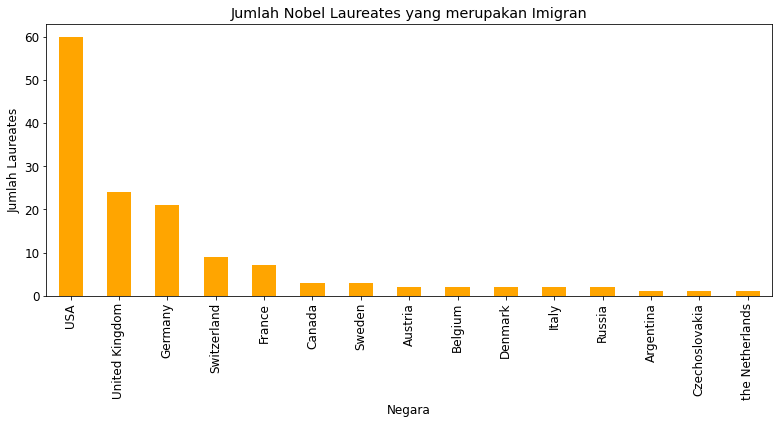

In [394]:
ctries = lr.groupby('country').size().sort_values(ascending=False).rename('Keseluruhan')
#imigran dicari dari perbedaan antara data negara yang diwakilkan dan data negara kelahiran tiap laureate
lr_imm = lr.loc[lr['bornCountry'] != lr['country']]
imm_cntry = lr_imm.groupby('country').size().sort_values(ascending=False).rename('Imigran')
imm_cntry.plot.bar(figsize=(13,5), color='orange')
plt.title('Jumlah Nobel Laureates yang merupakan Imigran'); plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')

Insight: Grafik jumlah Nobel Laureates imigran cenderung mengikuti grafik jumlah Nobel Laureates keseluruhan yang ada di grafik sebelumnya

Visualisasi perbandingan jumlah laureates yang pernah mendapat satu kali penghargaan & yang lebih dari sekali

Text(0, 0.5, 'Jumlah Penghargaan yang Didapat')

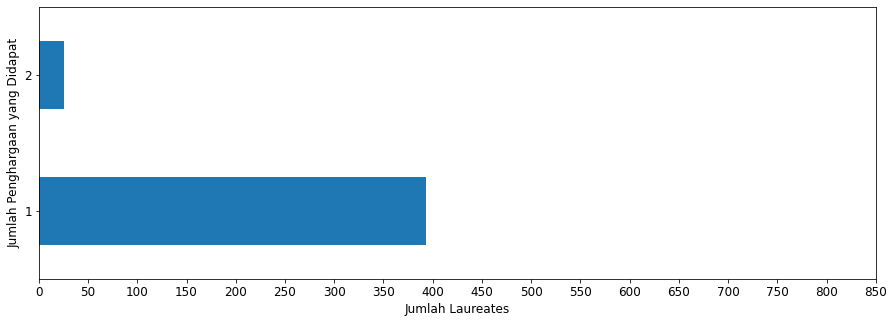

In [395]:
pog = lr[['firstname', 'surname']].value_counts()
pogdf = pog.to_frame().reset_index()
pogdf.rename(columns={0:'freq'}, inplace=True)
pogdf['freq'].value_counts().plot.barh(figsize=(15,5), xticks=range(0,900,50))
plt.xlabel('Jumlah Laureates'); plt.ylabel('Jumlah Penghargaan yang Didapat')

Insight: Mayoritas Nobel Laureates hanya pernah mendapat 1 kali penghargaan Nobel selama hidupnya, dan hanya 26 dari 419 keseluruhan laureates yang ada pernah mendapat dua kali penghargaan Nobel

Visualisasi perubahan jumlah laureates berdasarkan gender terhadap waktu

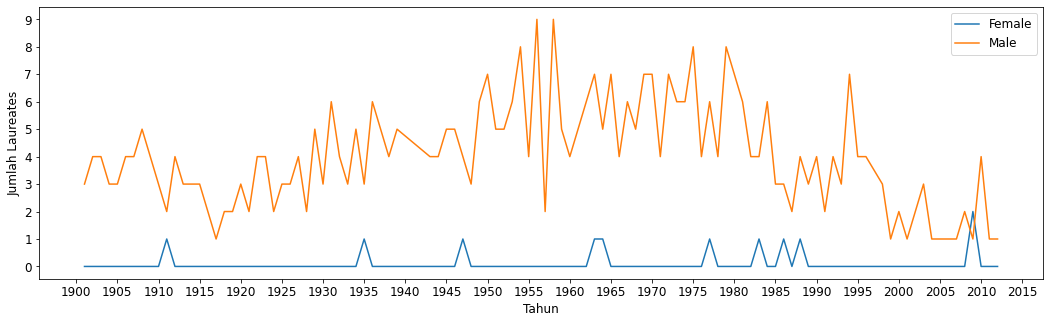

In [396]:
female = lr.loc[lr['gender'] == 'female'][['year']]
female = female['year'].value_counts().sort_index(ascending=True).rename('Female')
male = lr.loc[lr['gender'] == 'male'][['year']]
male = male['year'].value_counts().sort_index(ascending=True).rename('Male')
df = pd.concat([female, male], axis=1).fillna(0)
df.plot(figsize=(18,5), xticks=range(1900,2020,5), yticks=range(0, 10))
plt.xlabel('Tahun');plt.ylabel('Jumlah Laureates');plt.legend(['Female', 'Male'])

Insight: Grafik jumlah Nobel Laureates dari tahun ke tahun berfluktuasi secara acak & tidak mengikuti pola tertentu

Visualisasi Hierarki & Keseluruhan-Bagian pada pembagian hadiah
Seorang diri: Hadiah diberikan seutuhnya untuk satu orang
1/2 hadiah: Hadiah dibagi rata untuk dua orang
1/3 hadiah: Hadiah dibagi untuk 3 orang
1/4 hadiah: Hadiah dibagi untuk 4 orang

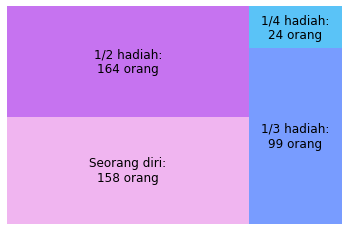

<Figure size 720x720 with 0 Axes>

In [397]:
import squarify

area = lr.groupby('share').size()
labels = ['Seorang diri:\n158 orang', '1/2 hadiah:\n164 orang',
          '1/3 hadiah:\n99 orang', '1/4 hadiah:\n24 orang']
color_list = ['#EB96EB', '#AF38EB', '#4073FF',
              '#14AAF5']

plt.rc('font', size=12)
squarify.plot(sizes=area, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')
plt.figure(figsize=(10,10))

plt.show()

Insight: secara keseluruhan, hasil kerja para Nobel Laureates lebih banyak dilakukan oleh kelompok dibandingkan kerja satu individu saja

Visualisasi Hierarki & Keseluruhan-Bagian antara jumlah imigran & native yang menyusun keseluruhan jumlah Nobel Laureates

Text(0, 0.5, 'Jumlah Laureates')

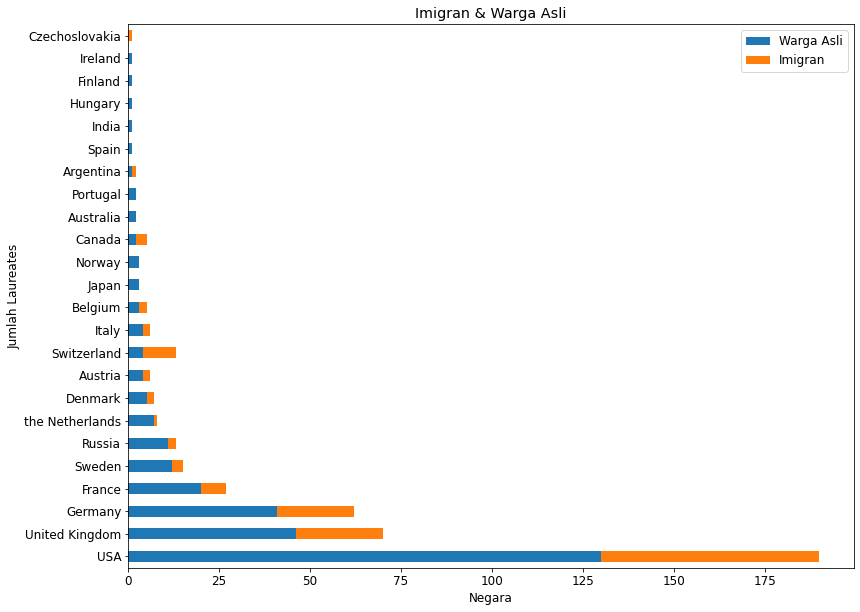

In [398]:
lr_noimm = lr.loc[lr['bornCountry'] == lr['country']]
noimm_cntry = lr_noimm.groupby('country').size().sort_values(ascending=False).rename('Warga Asli')
df = pd.concat([noimm_cntry, imm_cntry], axis=1)
df.plot.barh(figsize=(13,10), stacked=True)
plt.title('Imigran & Warga Asli'); plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')

Insight: urutan terbanyak jumlah imigran pada tiap negara cenderung sesuai dengan jumlah non imigrannya (makin banyak Nobel Laureate non-imigran, makin banyak jumlah Nobel Laureate imigran). Pada beberapa negara, jumlah Nobel Laureate imigran bahkan melebihi jumlah Nobel Laureate non-imigran seperti Switzerland, Canada, Argentina

Visualisasi Plotting-Relationships antara gender dan tahun (periode 5 tahun)

<AxesSubplot:ylabel='year'>

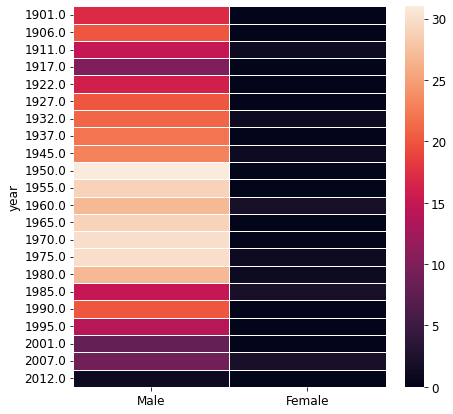

In [399]:
import seaborn as sb

df = pd.concat([female, male], axis=1).fillna(0);df.index.names = ['year']; df = df.reset_index()
year = df['year'].tolist()
for i in range(0, 105, 5):
    for j in range(1, 5):
        year[i+j] = year[i]
df['year'] = year
df2 = pd.concat([df.groupby('year')['Male'].sum(), df.groupby('year')['Female'].sum()], axis=1)
plt.figure(figsize=(7,7)); sb.heatmap(df2, linewidths = .5)

Insight: Jumlah Nobel Laureate perempuan tidak menunjukkan peningkatan signifikan tiap tahunnya. Jumlah Nobel Laureate laki-laki memuncak pada jumlah terbanyak di sekitar tahun 1950 dan di sekitar tahun 1970

Korelasi antara atribut 'age_at_prize', 'age_at_death', 'share' serta visualisasinya menggunakan heatmap

              age_at_prize  age_at_death     share
age_at_prize      1.000000      0.352593  0.157437
age_at_death      0.352593      1.000000  0.133336
share             0.157437      0.133336  1.000000


<AxesSubplot:>

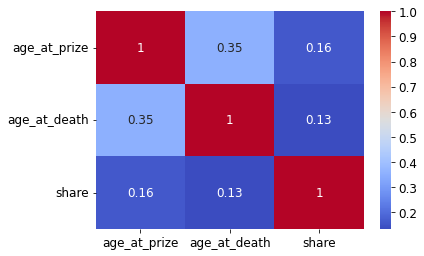

In [400]:
corr = lr[['age_at_prize', 'age_at_death', 'share']].corr()
print(corr)
sb.heatmap(corr, annot=True, cmap='coolwarm')

Insight: Diantara ketiga variabel tersebut, tidak ada yang saling berkolerasi positif. Artinya, ketiga variabel ini tidak menunjukkan hubungan proporsional antara satu sama lain